<a href="https://colab.research.google.com/github/ayush4972/Exploratory-Data-Analysis/blob/main/22BCE3913EDAprac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ayush Chaudhary 22BCE3913**

**Module 2**

In [ ]:
#https://github.com/ayush4972/Exploratory-Data-Analysis/blob/main/22BCE3913EDAprac.ipynb

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/student-mat.csv")
print(df.head(5))
print(df.tail(5))

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
390     M

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

,0
school,0
sex,2
age,0
address,1
famsize,1
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [ ]:
df = df.assign(
    sex=df['sex'].fillna(df['sex'].mode()[0]),
    address=df['address'].fillna(df['address'].mode()[0]),
    famsize=df['famsize'].fillna(df['famsize'].mode()[0]),
    schoolsup=df['schoolsup'].fillna(df['schoolsup'].mode()[0])
)

In [ ]:
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 100], labels=['0-18', '19-35', '36-50', '51+'])

In [ ]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,age_group
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,0-18
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,0-18
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,0-18
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,0-18
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,0-18
5,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,10,15,15,15,0-18
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,1,1,3,0,12,12,11,0-18
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,1,1,6,6,5,6,0-18
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,2,1,1,1,0,16,18,19,0-18
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,1,1,1,5,0,14,15,15,0-18


In [ ]:
df1SE =  pd.DataFrame({ 'StudentID': [2,3,4],
                       'ScoreSE' : [23,15,41]})
df2SE =  pd.DataFrame({'StudentID': [6,7,10],
                       'ScoreSE': [27,50,31]})

df1ML =  pd.DataFrame({ 'StudentID': [1,4,5],
                       'ScoreML' : [39,41,19]})
df2ML =  pd.DataFrame({'StudentID': [6,7,8,9],
                       'ScoreML': [20,43,31,34]})

dfSE = pd.concat([df1SE, df2SE], ignore_index=True)
dfML = pd.concat([df1ML, df2ML], ignore_index=True)

df2 = pd.concat([dfML, dfSE], axis=1)
df2

,StudentID,ScoreML,StudentID,ScoreSE
0,1,39,2.0,23.0
1,4,41,3.0,15.0
2,5,19,4.0,41.0
3,6,20,6.0,27.0
4,7,43,7.0,50.0
5,8,31,10.0,31.0
6,9,34,NaN,NaN


In [ ]:
df2 = dfSE.merge(dfML, how='inner')
df2

,StudentID,ScoreSE,ScoreML
0,4,41,41
1,6,27,20
2,7,50,43


In [ ]:
df2 = dfSE.merge(dfML, how='left')
df2

,StudentID,ScoreSE,ScoreML
0,2,23,NaN
1,3,15,NaN
2,4,41,41.0
3,6,27,20.0
4,7,50,43.0
5,10,31,NaN


In [ ]:
df2 = dfSE.merge(dfML, how='right')
df2

,StudentID,ScoreSE,ScoreML
0,1,NaN,39
1,4,41.0,41
2,5,NaN,19
3,6,27.0,20
4,7,50.0,43
5,8,NaN,31
6,9,NaN,34


In [ ]:
df.set_index(['age_group', 'address'], inplace=True)
subset = df.loc[('19-35', 'R')]
print(subset)

                  school sex  age famsize Pstatus  Medu  Fedu      Mjob  \
age_group address                                                         
19-35     R           GP   M   19     GT3       T     3     3     other   
          R           GP   F   19     GT3       T     2     3     other   
          R           GP   F   19     GT3       A     3     1  services   
          R           MS   M   19     GT3       T     1     1     other   
          R           MS   M   19     GT3       T     1     1     other   
          R           MS   M   19     GT3       T     1     1     other   
          R           MS   F   19     GT3       T     2     3  services   
          R           MS   M   21     GT3       T     1     1     other   

                       Fjob      reason  ... famrel  freetime  goout  Dalc  \
age_group address                        ...                                 
19-35     R        services  reputation  ...      4         5      3     1   
          R    

<ipython-input-16-92fb013a78c5>:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  subset = df.loc[('19-35', 'R')]


In [ ]:
series1 = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
series2 = pd.Series([4, 5, 6], index=['d', 'e', 'f'])
concatenated_series = pd.concat([series1, series2], keys=['Series1', 'Series2'])
concatenated_series

Series1  a    1
         b    2
         c    3
Series2  d    4
         e    5
         f    6
dtype: int64

In [ ]:
unstacked_df = concatenated_series.unstack()
unstacked_df

,a,b,c,d,e,f
Series1,1.0,2.0,3.0,NaN,NaN,NaN
Series2,NaN,NaN,NaN,4.0,5.0,6.0


In [ ]:
df['failures'] = pd.cut(df['failures'], bins=2, labels=['yes', 'no'])
df.head()

school sex  age famsize Pstatus  Medu  Fedu     Mjob  \
age_group address                                                        
0-18      U           GP   F   18     GT3       A     4     4  at_home   
          U           GP   F   17     GT3       T     1     1  at_home   
          U           GP   F   15     LE3       T     1     1  at_home   
          U           GP   F   15     GT3       T     4     2   health   
          U           GP   F   16     GT3       T     3     3    other   

                       Fjob  reason  ... famrel  freetime  goout Dalc Walc  \
age_group address                    ...                                     
0-18      U         teacher  course  ...      4         3      4    1    1   
          U           other  course  ...      5         3      3    1    1   
          U           other   other  ...      4         3      2    2    3   
          U        services    home  ...      3         2      2    1    1   
          U           other    home  ...      4         3      2    1    2   

                  health absences  G1  G2  G3  
age_group address                              
0-18      U            3        6   5   6   6  
          U            3        4   5   5   6  
          U            3       10   7   8  10  
          U            5        2  15  14  15  
          U            5        4   6  10  10  

[5 rows x 32 columns]

In [ ]:
Q1 = df['health'].quantile(0.25)
Q3 = df['health'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['health'] < (Q1 - 1.5 * IQR)) | (df['health'] > (Q3 + 1.5 * IQR))]
print(outliers)

Empty DataFrame
Columns: [school, sex, age, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3]
Index: []

[0 rows x 32 columns]


In [ ]:
Q1 = df['absences'].quantile(0.25)
Q3 = df['absences'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['absences'] >= (Q1 - 1.5 * IQR)) & (df['absences'] <= (Q3 + 1.5 * IQR))]
print(outliers)

                  school sex  age famsize Pstatus  Medu  Fedu      Mjob  \
age_group address                                                         
0-18      U           GP   F   18     GT3       A     4     4   at_home   
          U           GP   F   17     GT3       T     1     1   at_home   
          U           GP   F   15     LE3       T     1     1   at_home   
          U           GP   F   15     GT3       T     4     2    health   
          U           GP   F   16     GT3       T     3     3     other   
...                  ...  ..  ...     ...     ...   ...   ...       ...   
19-35     U           MS   M   20     LE3       A     2     2  services   
0-18      U           MS   M   17     LE3       T     3     1  services   
19-35     R           MS   M   21     GT3       T     1     1     other   
0-18      R           MS   M   18     LE3       T     3     2  services   
19-35     U           MS   M   19     LE3       T     1     1     other   

                       F

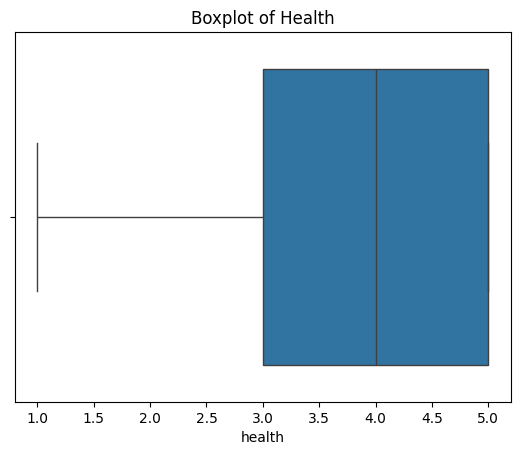

In [ ]:
sns.boxplot(x=df['health'])
plt.title("Boxplot of Health")
plt.show()

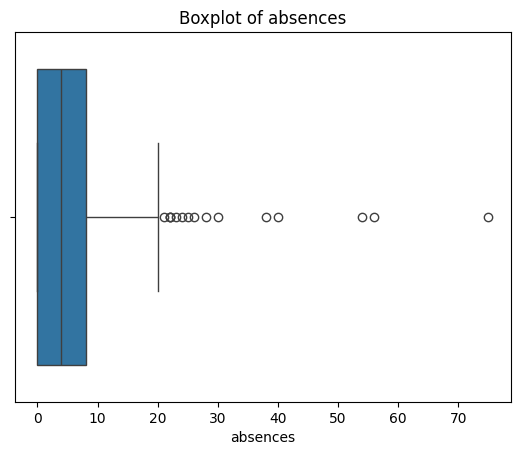

In [ ]:
sns.boxplot(x=df['absences'])
plt.title("Boxplot of absences")
plt.show()

**MODULE 3**

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/student-mat.csv")
print(df.head(5))
print(df.tail(5))

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
390     M

In [ ]:
df.dtypes

,0
school,object
sex,object
age,int64
address,object
famsize,object
Pstatus,object
Medu,int64
Fedu,int64
Mjob,object
Fjob,object


In [ ]:
print(df.describe())
pd.isna(df).any()

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

,0
school,False
sex,True
age,False
address,True
famsize,True
Pstatus,False
Medu,False
Fedu,False
Mjob,False
Fjob,False


In [ ]:
age = df['age'].loc[df['age'] != '?']
print(age)
df['age'] = df['age'].fillna(df['age'].mean())
df['age'] = df['age'].astype(int)
print(df['age'].head())

0      18
1      17
2      15
3      15
4      16
       ..
390    20
391    17
392    21
393    18
394    19
Name: age, Length: 395, dtype: int64
0    18
1    17
2    15
3    15
4    16
Name: age, dtype: int64


In [ ]:
schoolsup = df['schoolsup'].loc[df['schoolsup'] != '?']
print(schoolsup)
df['schoolsup'] = df['schoolsup'].fillna(df['schoolsup'].mode()[0])

address = df['address'].loc[df['address'] != '?']
print(address)
df['address'] = df['address'].fillna(df['address'].mode()[0])

print(df[['schoolsup', 'address']].head())

0      yes
1       no
2      yes
3       no
4       no
      ... 
390     no
391     no
392     no
393     no
394     no
Name: schoolsup, Length: 395, dtype: object
0      U
1      U
2      U
3      U
4      U
      ..
390    U
391    U
392    R
393    R
394    U
Name: address, Length: 393, dtype: object
  schoolsup address
0       yes       U
1        no       U
2       yes       U
3        no       U
4        no       U


In [ ]:
mean = df["absences"].mean()
median =df["absences"].median()
mode = df["absences"].mode()
print(mean , median, mode)
df['age'].max()

5.708860759493671 4.0 0    0
Name: absences, dtype: int64


22

In [ ]:
df['age_group'] = pd.cut(df['age'], bins=[0, 10, 15, 20, 25], labels=['0-10', '11-15', '16-20', '21-25'])

Text(0.5, 0, 'Age Group')

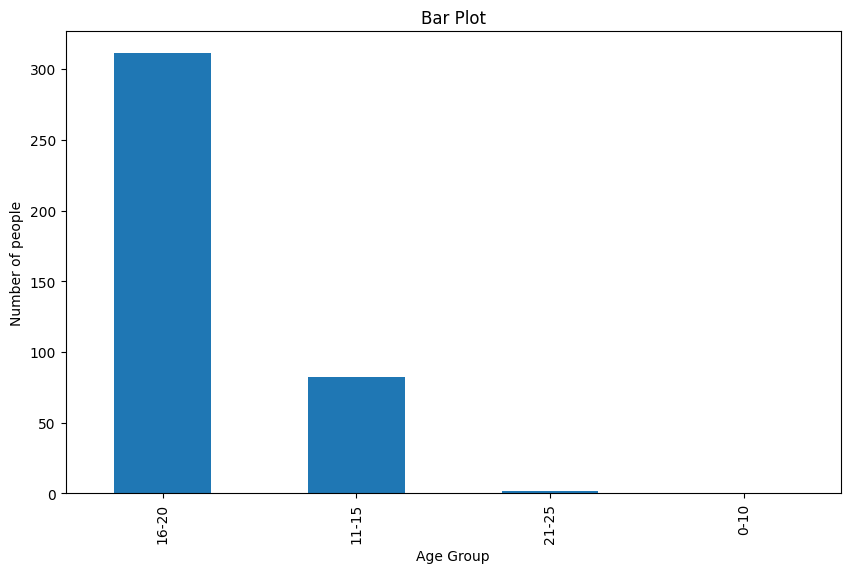

In [ ]:
df.age_group.value_counts().nlargest(30).plot(kind='bar', figsize=(10,6))
plt.title("Bar Plot")
plt.ylabel('Number of people')
plt.xlabel('Age Group')

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


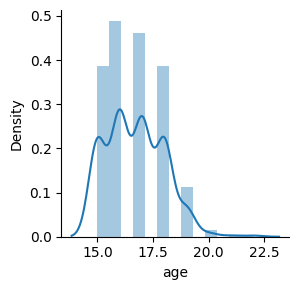

In [ ]:
sns.FacetGrid(df).map(sns.distplot,"age").add_legend()

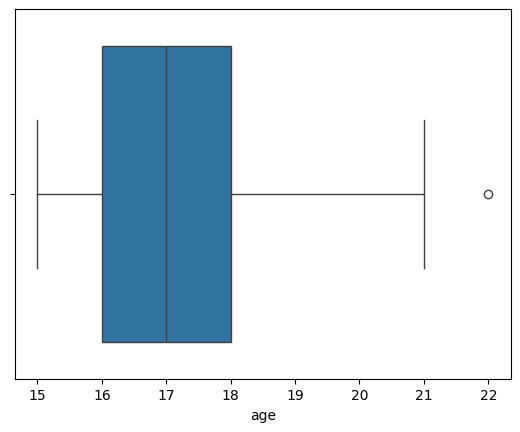

In [ ]:
sns.boxplot(x="age",data=df)
plt.show()

Text(0, 0.5, 'absences')

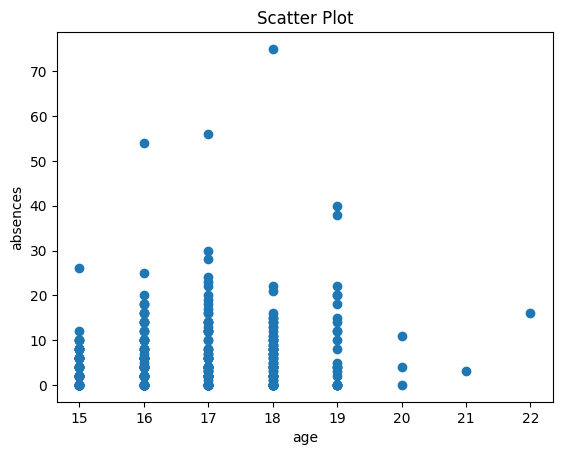

In [ ]:
plt.scatter(df["age"], df["absences"])
plt.title("Scatter Plot")
plt.xlabel("age")
plt.ylabel("absences")

In [ ]:
np.corrcoef(df["age"], df["absences"])

array([[1.        , 0.17523008],
       [0.17523008, 1.        ]])

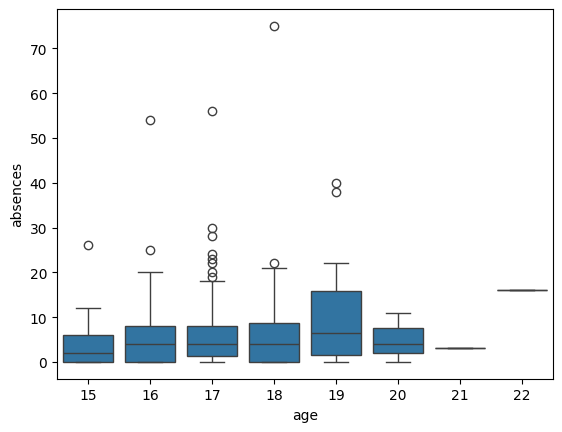

In [ ]:
sns.boxplot(x="age",y="absences",data=df)
plt.show()

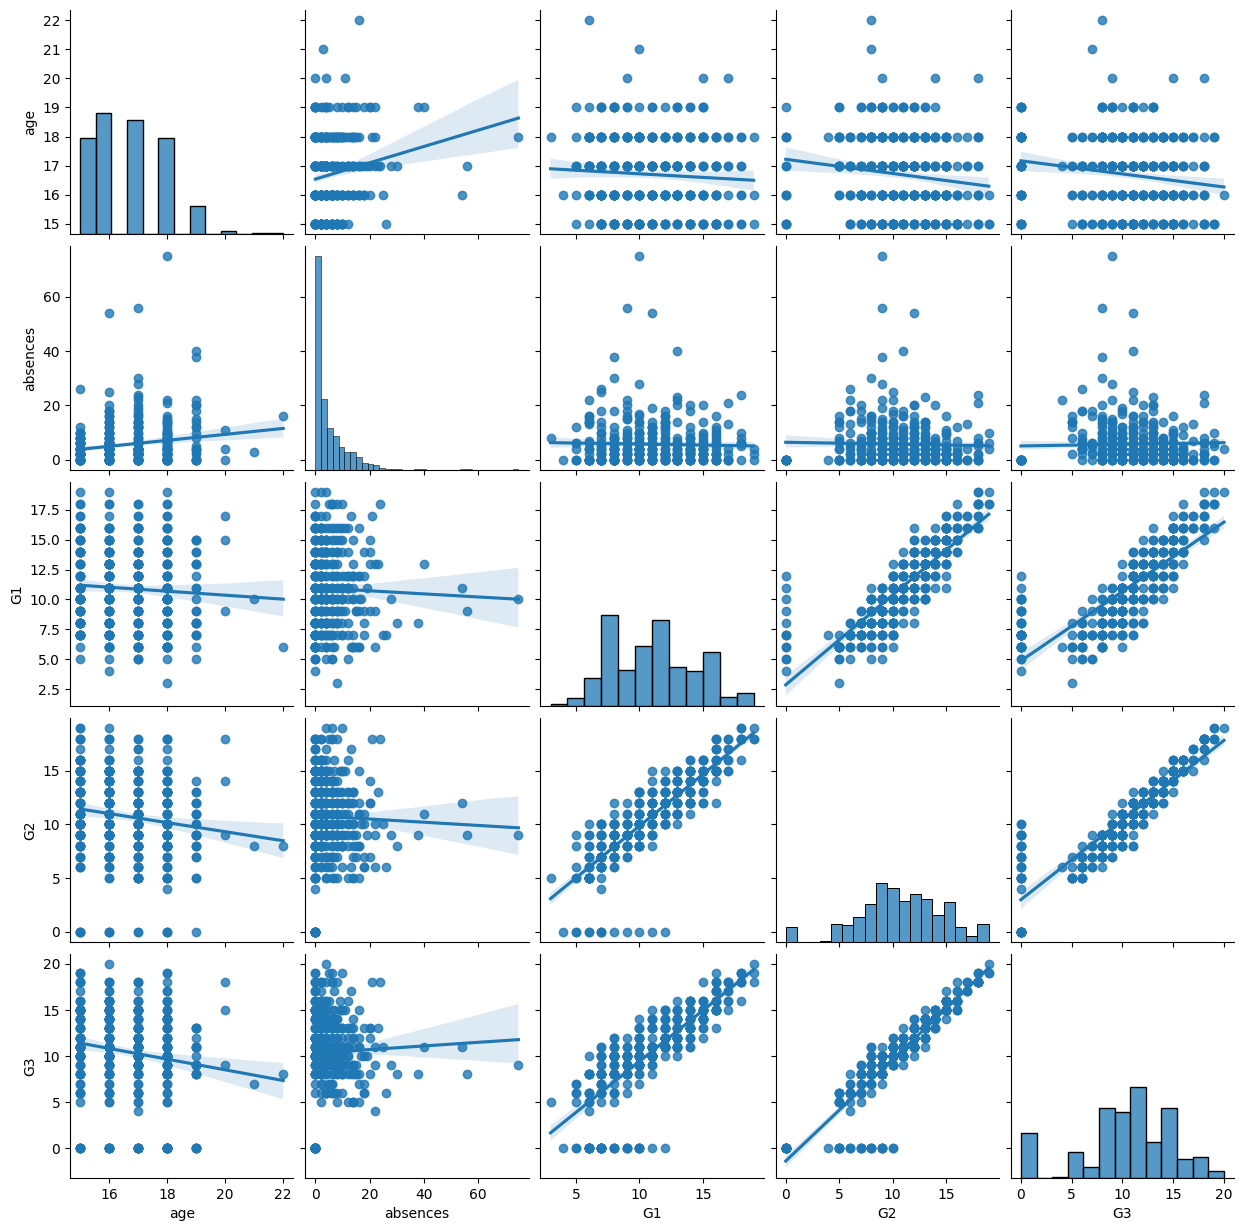

In [ ]:
sns.pairplot(df, vars=['age', 'absences', 'G1', 'G2', 'G3'], kind="reg")
plt.show()

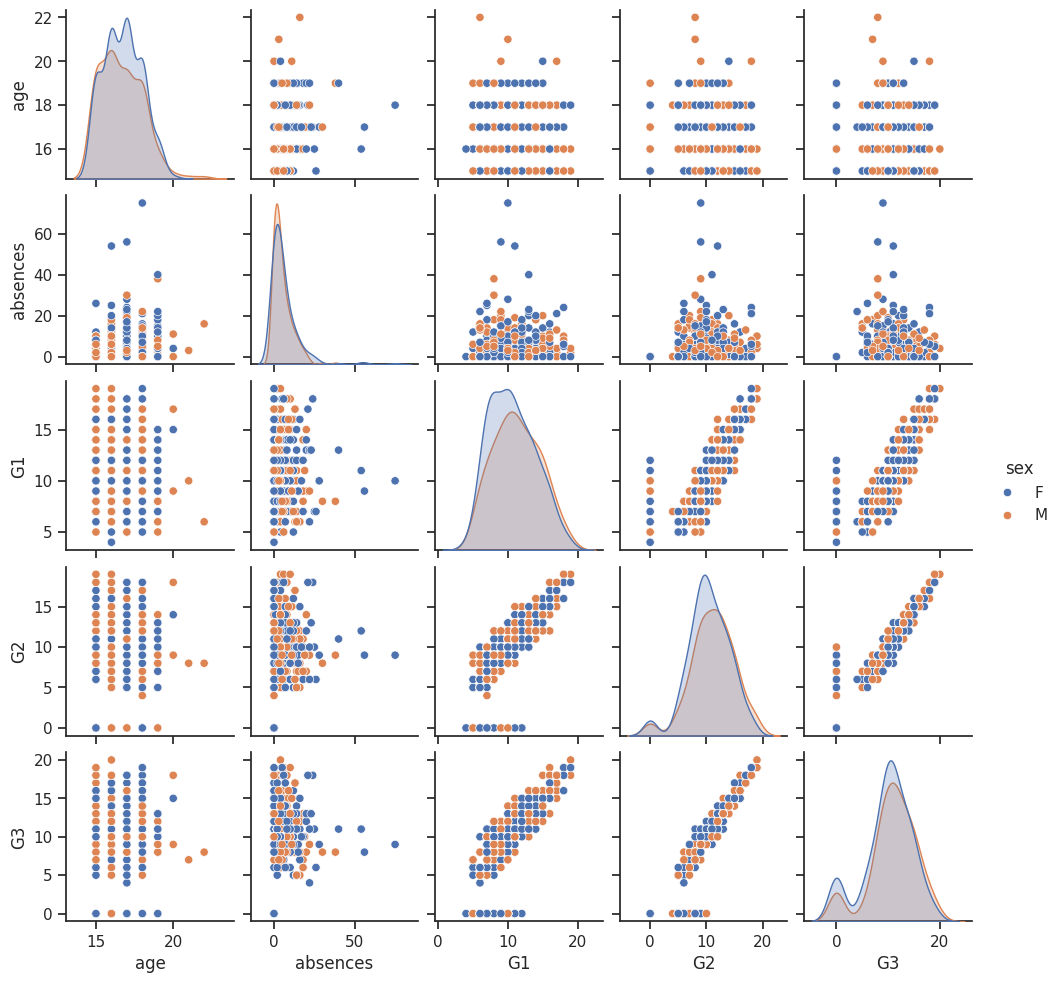

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, height=2, vars=['age', 'absences', 'G1', 'G2', 'G3'], hue="sex")
plt.show()

In [ ]:
from scipy import stats

corr = stats.pearsonr(df["age"], df["G3"])
print("p-value:\t", corr[1])
print("correlation:\t", corr[0])

p-value:	 0.0012714385457178073
correlation:	 -0.16157943813834025


In [ ]:
correlation = df.corr(method='pearson', numeric_only=True)
correlation

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


<Axes: >

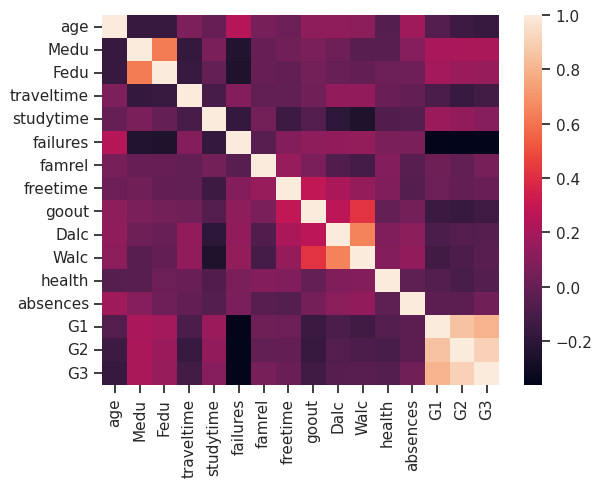

In [ ]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)

**Skewness**

In [ ]:
from scipy.stats import skew

skewness_values = df[['age', 'absences', 'G1', 'G2', 'G3']].apply(skew)
print("Skewness values:\n", skewness_values)

Skewness values:
 age         0.464498
absences    3.657622
G1          0.239699
G2         -0.430004
G3         -0.729887
dtype: float64


**Kurtosis**

In [ ]:
from scipy.stats import kurtosis

kurtosis_values = df[['age', 'absences', 'G1', 'G2', 'G3']].apply(kurtosis)
print("Kurtosis values:\n", kurtosis_values)

Kurtosis values:
 age         -0.016358
absences    21.430045
G1          -0.700229
G2           0.604637
G3           0.383181
dtype: float64


**Clustering**

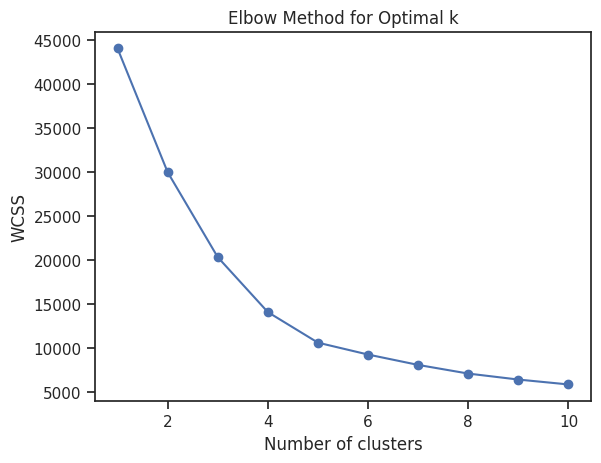

   age  absences  G1  G2  G3  Cluster
0   18         6   5   6   6        2
1   17         4   5   5   6        2
2   15        10   7   8  10        2
3   15         2  15  14  15        0
4   16         4   6  10  10        2


In [ ]:
 from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df[['age', 'absences', 'G1', 'G2', 'G3']]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)
print(df[['age', 'absences', 'G1', 'G2', 'G3', 'Cluster']].head())

**PCA**

       PCA1      PCA2
0 -2.411923  0.471734
1 -2.464202 -0.249157
2 -0.978589 -0.629788
3  1.952638 -1.045875
4 -0.916982 -0.655257


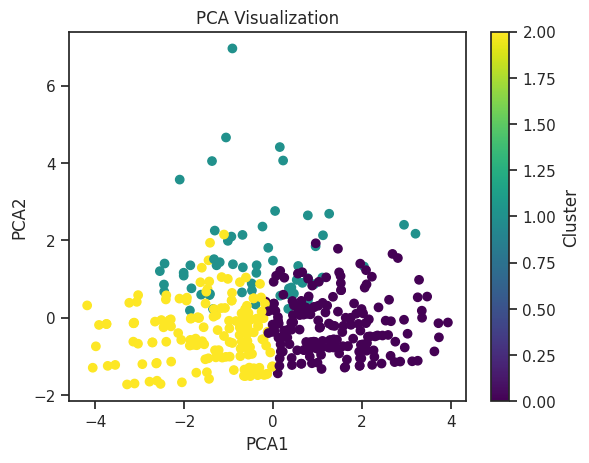

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['age', 'absences', 'G1', 'G2', 'G3']])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

print(df[['PCA1', 'PCA2']].head())

plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA Visualization')
plt.colorbar(label='Cluster')
plt.show()

**Simple Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['age', 'absences']]
y = df['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-Squared Score:", r2_score(y_test, y_pred))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 20.051785941697524
R-Squared Score: 0.022104866204058493
Coefficients: [-0.57820172  0.04865224]
Intercept: 19.71987406741109


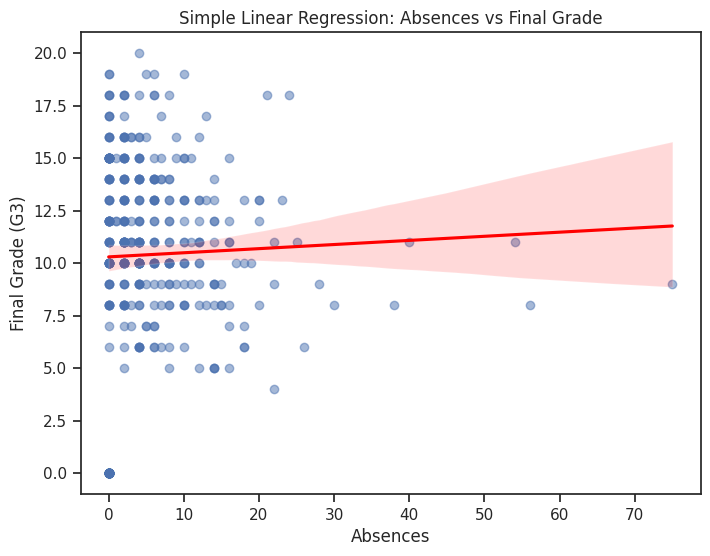

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.regplot(x=df['absences'], y=df['G3'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.xlabel('Absences')
plt.ylabel('Final Grade (G3)')
plt.title('Simple Linear Regression: Absences vs Final Grade')
plt.show()